# Recognizing Handwritten Digits using Scikit-Learn

MNIST dataset: https://en.wikipedia.org/wiki/MNIST_database

![alt text][img]

[img]: https://i.imgur.com/2xVHT7a.png "not the best handwriting"

* 28x28 (784 pixels total) images of handwritten digits
* each image has a label 0-9
* ~~70,000~~ 42,000 total images & labels
* our goal is to correctly guess the label when we can only see pixel data

# Machine Learning Rundown

"Machine Learning is the science (and art) of programming computers so they can *learn from data.*"

* Aurélien Géron, *Hands-On Machine Learning with Scikit-Learn & Tensorflow*

**Some useful resources**

* Scikit-Learn's introduction to machine learning: http://scikit-learn.org/stable/tutorial/basic/tutorial.html
* MIT OpenCourseWare: https://www.youtube.com/watch?v=h0e2HAPTGF4
* kaggle - datasets and ML competitions: https://www.kaggle.com/datasets

**Example: Spam-filter**

* Learns to flag spam from given examples of spam emails and regular, "ham", emails
* This set of example emails is called the *training set*
* Each email in the training set is called an *instance*
* Each instance contains *data* (contents of the email) and a *target* ('spam' or 'ham')
* Each point of data within an instance is a *feature*
* For training purposes, we separate the data and target

**Math notation**

* Uppercase Bold = Matrices
    * e.g. $\mathbf{A}$  
* Lowercase Bold = Vectors  
    * e.g. $\mathbf{a}$
* Italics = Scalars  
    * e.g. $a$
* Rows are indexed by subscript, Columns by superscript

$\mathbf{X}$ is a matrix containing the data portion of our dataset (no labels)

* $\mathbf{X}$ has $n$ rows (instances) and $m$ columns (features)

The i-th row of the matrix, $\mathbf{x}_i$, is one instance in our dataset.

The j-th element of the i-th row is the value of one feature for a given instance, denoted $x_i^j$

$\mathbf{y}$ is the target vector containing a label for each instance 

The i-th element of the target vector is a label for a single instance, $y_i$

* Sometimes our data doesn't have labels. When we have labels for training, it's called *Supervised Learning*. When we don't, it's *Unsupervised Learning.* We'll stick to Supervised Learning for now.

Our model is a function, $h$, which takes in an instance, $\mathbf{x}_i$, and gives us a *Predicted Label*, $\hat{y_i}$

$$\large{ h(\mathbf{x}_i) = \hat{y_i} }$$

if $\hat{y_i} = y_i$, then our model guessed the label perfectly for the i-th instance

We can also run our model on all instanes in our dataset in one go:

$$\large{ h(\mathbf{X}) = \mathbf{\hat{y}} }$$

In practice, we split the given dataset into a *Training Set* and *Test Set*, so we can evaluate our models after we train them.
*It is very important that we do not let our models see the test data during training!* Our goal is not to memorize our data, but to create a model capable of classifyig data it has never seen.

# Fetch the Data

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt     # pretty pictures
from keras.datasets import mnist    # our dataset
from IPython.display import display # pretty tables

# The load_data() method provided here separates data and labels, and does the test/train split for us. Convenient!
(X_train, y_train), (X_test, y_test) = mnist.load_data()


print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


In [3]:
from sklearn.datasets import load_digits
digits = load_digits()


"Optical Recognition of Handwritten Digits Data Set\n===================================================\n\nNotes\n-----\nData Set Characteristics:\n    :Number of Instances: 5620\n    :Number of Attributes: 64\n    :Attribute Information: 8x8 image of integer pixels in the range 0..16.\n    :Missing Attribute Values: None\n    :Creator: E. Alpaydin (alpaydin '@' boun.edu.tr)\n    :Date: July; 1998\n\nThis is a copy of the test set of the UCI ML hand-written digits datasets\nhttp://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits\n\nThe data set contains images of hand-written digits: 10 classes where\neach class refers to a digit.\n\nPreprocessing programs made available by NIST were used to extract\nnormalized bitmaps of handwritten digits from a preprinted form. From a\ntotal of 43 people, 30 contributed to the training set and different 13\nto the test set. 32x32 bitmaps are divided into nonoverlapping blocks of\n4x4 and the number of on pixels are counted 

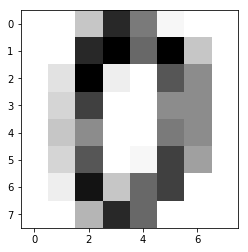

In [5]:
digits.data.shape

plt.imshow(digits.data[0].reshape((8,8)), cmap="Greys")
plt.show()

# Preprocess the Data

Our data is not in the exact format we want. We will use the reshape() method from numpy to fix this transform our data from 3D arrays to 2D

In [6]:
# we want to preserve the # of rows, but collapse the last two dimensions into one
X_train = X_train.reshape(X_train.shape[0], -1)
X_test = X_test.reshape(X_test.shape[0], -1)
print(X_train.shape)
print(X_test.shape)

(60000, 784)
(10000, 784)


# Display A Random Training Image

Showing image  34093  from training set
Label:  4


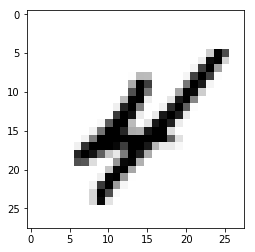

In [10]:
rand_index = np.random.randint(0, X_train.shape[0])
print('Showing image ', rand_index, ' from training set')
plt.imshow(X_train[rand_index].reshape(28,28), cmap='Greys') # reshape the image back to a 2d array for display
# cmap keyword: defines colorspace of image
# https://matplotlib.org/examples/color/colormaps_reference.html
#plt.axis('off')
print('Label: ', y_train[rand_index])

# Binary Classifier

Easy starting point. Output is True or False (in the class, or not in the class)

In this case, we'll recognize whether a digit is 5.

In [11]:
# First, we need to restructure our labels (no need to modify the data itself)
y_train_5 = (y_train == 5)
y_test_5 = (y_test == 5)

# let's take a peak at our new training labels
print(y_train[0:10])   # multiclass
print(y_train_5[0:10]) # binary
# now, instead of digits 0-9, we have 0's for 'not 5' and 1's for '5' - Perfect!

[5 0 4 1 9 2 1 3 1 4]
[ True False False False False False False False False False]


# Scikit-Learn

* list of classification models: http://scikit-learn.org/stable/supervised_learning.html
* To start, we will use a SGDClassifier http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.SGDClassifier.html
    - SGD is the name of the training algorithm, "Stochastic Gradient Descent." We'll learn much more about Gradient Descent soon!
    - This is a linear model, meaning it finds linear boundaries between classes (remember, our classes to start out with are 'five' and 'not five')
    - The main reason I've selected this model is that it's simplicity allows for much faster training on our high-dimensional dataset. The trade-off is that it will be less accurate than more complex models.
* To train models in sklearn, we only have to call the fit() function and pass in our data and labels

# Training

In [12]:
from sklearn.linear_model import SGDClassifier

# there are many parameters we can set here, but they all have default values, so we can safely leave this blank for now
classifier = SGDClassifier() 
classifier.fit(X_train, y_train_5) # This line alone trains the model. We need to pass in the data and labels
# We'll implement our own fit() function soon!

# ignore the warning - the default parameters for this class work fine for our purposes

/home/charlie/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)


SGDClassifier(alpha=0.0001, average=False, class_weight=None, epsilon=0.1,
       eta0=0.0, fit_intercept=True, l1_ratio=0.15,
       learning_rate='optimal', loss='hinge', max_iter=None, n_iter=None,
       n_jobs=1, penalty='l2', power_t=0.5, random_state=None,
       shuffle=True, tol=None, verbose=0, warm_start=False)

# Making a Prediction

Index  3469 :
Predicted Label:  [False]
Actual Label (binary):  False
Actual Label (multi-class):  3


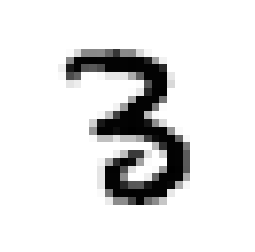

In [22]:
rand_index = np.random.randint(0, 5000)
# once the model has been trained, we only have to call the predict() function!
prediction = classifier.predict([X_test[rand_index]]) # pass in a random row from X_test

print("Index ", rand_index, ":")
print("Predicted Label: ", prediction)
print("Actual Label (binary): ", y_test_5[rand_index])
print("Actual Label (multi-class): ", y_test[rand_index])

plt.imshow(X_test[rand_index].reshape(28,28), cmap='Greys')
plt.axis('off')
plt.show()

Wow, it worked!! Or maybe it didn't. Either way, one example from the test set doesn't tell us much, and we isolated 5,000 instances for a reason. Fortunately, we can run predict() on the entire test set and get back an array of 5,000 predicted labels. 

# Model Evaluation

In [23]:
from sklearn.metrics import accuracy_score

y_test_5_pred = classifier.predict(X_test) # pass in the entire test set
score = accuracy_score(y_test_5, y_test_5_pred)
print(score)

0.9612


Wow, that's a great score! Guess our simple model did pretty well on it's own? Not necessarily.

Just because we are doing a binary classification task doesn't mean that our data is split evenly into two classes! In this case, only 10% of the samples are in the 'five' class, and the rest are 'not five', so a "dumb" model that just spits out [ False ] Every time would have *90% accuracy!*

This kind of situation is called *Label Imbalance*



# Confusion Matrix

We can't rely on a single metric to evaluate our model. The *Confusion Matrix* is a useful tool for evaluation, because it shows us how many instances are classified correctly and incorrectly for both of our classes. More precisely,

$$\text{confusion matrix} = \begin{bmatrix} \text{True Negative} & \text{False Positive} \\ \text{False Negative} & \text{True Positive} \end{bmatrix}$$

In [24]:
from sklearn.metrics import confusion_matrix
conf_mx = confusion_matrix(y_test_5, y_test_5_pred)
print(conf_mx)

[[8871  237]
 [ 151  741]]


# Precision and Recall

Two more useful values we can extract from the confusion matrix are *Precision* and *Recall.*

https://en.wikipedia.org/wiki/Precision_and_recall

* Precision is the proportion of instances that were correctly labeled as 'True' out of all the 'True' predictions
    - How many of our selected items were classified correctly?
    - Higher precision => fewer false positives
* Recall is the proportion of instances that were correctly labeled as 'True' out of all the instances that actually are 'True'
    - How many of the total relevant items did we get?
    - Higher recall => fewer false negatives
    
More formally,

$\text{Precision} = \large{\frac{\text{True Positive}}{\text{True Positive + False Positive}}}$

$\text{Recall} = \large{\frac{\text{True Positive}}{\text{True Positive + False Negative}}}$

In [25]:
from sklearn.metrics import precision_score, recall_score

precision = precision_score(y_test_5, y_test_5_pred)
recall = recall_score(y_test_5, y_test_5_pred)
print("Precision: ", precision)
print("Recall: ", recall) 

Precision:  0.7576687116564417
Recall:  0.8307174887892377


# Multiclass Classification

In [26]:
multi_clf = SGDClassifier()
multi_clf.fit(X_train, y_train) # same data, different labels

/home/charlie/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)


SGDClassifier(alpha=0.0001, average=False, class_weight=None, epsilon=0.1,
       eta0=0.0, fit_intercept=True, l1_ratio=0.15,
       learning_rate='optimal', loss='hinge', max_iter=None, n_iter=None,
       n_jobs=1, penalty='l2', power_t=0.5, random_state=None,
       shuffle=True, tol=None, verbose=0, warm_start=False)

# Accuracy, Confusion Matrix

In [27]:
y_test_pred = multi_clf.predict(X_test)

acc = accuracy_score(y_test, y_test_pred)
conf_mx = confusion_matrix(y_test, y_test_pred) # what does the confusion matrix look like for multiclass predictions?

print(acc) # How is this accuracy score different from the binary accuracy score? 
           # Is it a better or worse measure of performance?
display(pd.DataFrame(conf_mx)) # convert to dataframe so it prints with indices, use display() to make it pretty

0.8526


,0,1,2,3,4,5,6,7,8,9
0,939,0,4,4,0,5,4,2,22,0
1,0,1069,7,1,0,1,3,2,51,1
2,4,5,864,22,16,5,12,9,91,4
3,1,1,49,839,2,46,1,18,51,2
4,0,0,6,5,931,1,2,11,14,12
5,8,2,4,23,21,753,10,11,58,2
6,11,4,25,1,23,40,831,1,22,0
7,5,3,25,5,4,1,1,954,18,12
8,1,5,15,14,15,38,4,19,862,1
9,10,9,7,12,236,17,0,137,97,484


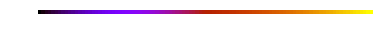

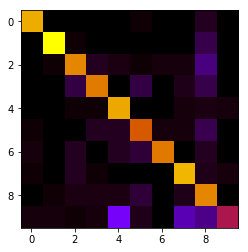

In [28]:
# Show color map for reference
plt.imshow(np.arange(0, 1, 0.01).reshape(1,-1), cmap = 'gnuplot')
plt.axis('off')
plt.show()

# Display confusion matrix as an image
plt.imshow(conf_mx, cmap = 'gnuplot')
plt.show()

# Precision and Recall for Multiclass Predictions

**TODO:** explanation

In [ ]:
precision_weighted = precision_score(y_test, y_test_pred, average="weighted")
recall_weighted = recall_score(y_test, y_test_pred, average="weighted")
precision_macro = precision_score(y_test, y_test_pred, average="macro")
recall_macro = recall_score(y_test, y_test_pred, average="macro")

print("Precision (weighted avg): ", precision_weighted)
print("Recall (weighted avg): ", recall_weighted)
print("Precision (simple avg): ", precision_macro)
print("Recall (simple avg): ", recall_macro)